In [ ]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
import math


In [ ]:
filename = str(input().rstrip())
ls_scene = int(input())
function = int(input())
q_param = int(input())
ls_image = int(input())
n_bits = int(input())
seed = int(input())
print("%s %d %d %d %d %d %d" %
      (filename, ls_scene, function, q_param, ls_image, n_bits, seed))


ex1.npy 5 1 2 3 8 1


In [ ]:
filename = 'case2.npy'
ls_scene = 512
function = 2
q_param = 75
ls_image = 256
n_bits = 8
seed = 1
matriz_R = np.load(filename)


In [ ]:
filename = 'case1.npy'
ls_scene = 512
function = 1
q_param = 1
ls_image = 512
n_bits = 8
seed = 1
matriz_R = np.load(filename)

In [ ]:
filename = 'case3.npy'
ls_scene = 720
function = 3
q_param = 1001
ls_image = 256
n_bits = 5
seed = 1
matriz_R = np.load(filename)

In [ ]:
filename = 'case5.npy'
ls_scene = 1024
function = 5
q_param = 1
ls_image = 720
n_bits = 1
seed = 51
matriz_R = np.load(filename)

In [ ]:
def funcao(x,y,n,q):
    if n == 1:
        return (x*y + 2*y)
    elif n==2:
        return np.abs(np.cos(x/q) + 2*np.sin(y/q))
    elif n==3:
        return np.abs(3*x/q - math.pow(y/q,1/3))
    elif n==4:
        return random.random()
    elif n==5:
        matrix = np.zeros((ls_scene,ls_scene))
        x = 0
        y = 0
        step = 1+ls_scene**2
        matrix[x][y] = 1
        for k in range(0, step):
          dx = random.randint(-1,1)
          dy = random.randint(-1,1)
          x = int((x + dx) % ls_scene)
          y = int((y + dy) % ls_scene)
          matrix[x][y] = 1
        return matrix


In [ ]:
random.seed(seed)
scene = np.ones((ls_scene,ls_scene), dtype=float)
if(function == 5):
  scene = funcao(0,0,function,q_param)
  print(scene.shape)
else :  
  for i in range (ls_scene):
      for j in range (ls_scene):
          scene[i][j] = float(funcao(i,j,function,q_param))

print(np.max(scene))
#scene = ((scene-np.min(scene)/(np.max(scene)-np.min(scene))*pow(2,16)))
print(np.min(scene))
min = np.min(scene)
max = np.max(scene)

for i in range (ls_scene):
    for j in range (ls_scene):
        scene[i][j] = (scene[i][j] - min)/(max-min)*65535
print(np.max(scene))

262143.0
0.0
65535.0


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ...   1   1   1]
 ...
 [  0   0   0 ... 253 253 254]
 [  0   0   0 ... 253 254 254]
 [  0   0   0 ... 254 254 255]]

original
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ...   1   1   1]
 ...
 [  0   0   0 ... 253 253 254]
 [  0   0   0 ... 253 254 254]
 [  0   0   0 ... 254 254 255]]


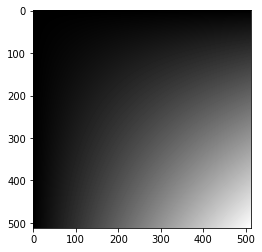

In [ ]:
step = int( ls_scene / ls_image)
image = np.ones((ls_image,ls_image), dtype = int)
i2 = 0
j2 = 0
min = np.min(scene)
max = np.max(scene)
#image = scene*255/65535
for i in range(ls_image):
    for j in range(ls_image):
      
        image[i][j] = np.uint8(((scene[i2][j2] - min)/(max-min))*255)
        image[i][j] = image[i][j] >> 8 - n_bits
        j2 += step
    j2 = 0
    i2 += step
#print(np.max(image))
print(image)
print()

#print(image)
print("original")
print(matriz_R)
plt.imshow(image.astype(np.uint8), cmap="gray")
#print(np.max(scene))


In [ ]:
RSE = 0
for i in range(ls_image):
    for j in range(ls_image):
        RSE += math.pow( - matriz_R[i][j],2)
image[i][j]
RSE = math.pow(RSE,0.5)
print(RSE)

0.0


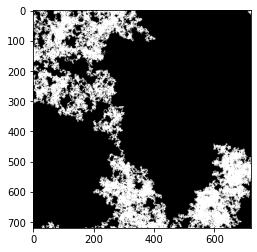

In [ ]:
plt.imshow(matriz_R.astype(np.uint8), cmap="gray")

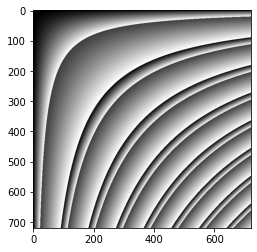

In [ ]:
plt.imshow(image.astype(np.uint8), cmap="gray")

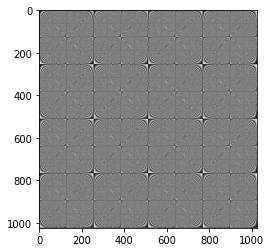

In [ ]:
plt.imshow(scene.astype(np.uint8), cmap="gray")